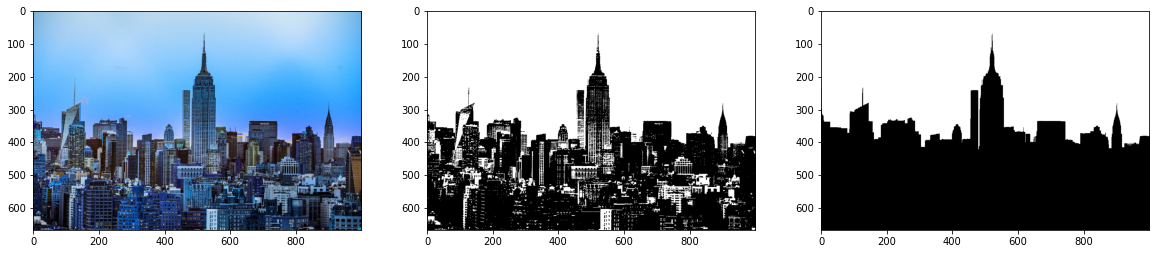

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
from scipy.misc import face
import sys
import cv2
sys.setrecursionlimit(30000)
num_clusters = 8
import time
start_time = time.time()
def rgb2grayscale(im):        
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)        
        return im
input_file = 'one.jpg'
im = cv2.imread(input_file)
cv2.imwrite('output'+str('_out1.png'),cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) ) 
h,w,c = im.shape
#print('original resolution ' +str(w)+' x '+str(h))

# Resize image due to recursion limitation
#while (h>400 or w > 400):
 #   im = cv2.resize(im, dsize=(w//2, h//2), interpolation=cv2.INTER_CUBIC)
  #  h,w,c = im.shape
img  = rgb2grayscale(np.array(im))
width, height = img.shape
#print('reduced resolution ' +str(width)+' x '+str(height))
# flatten image
img_ = img.reshape(-1,1)

kmeans = KMeans(n_clusters=2).fit(img_)
values = kmeans.cluster_centers_.squeeze()
labels = kmeans.labels_

x=list(values).index(max(values))


img_compressed = np.choose(labels, values)
img_compressed.shape = img.shape
labels_reshaped = labels.reshape(width, height)

f, axarr = plt.subplots(1,3,figsize=(20, 9))
axarr[0].imshow(im,cmap='gray')
axarr[1].imshow(labels_reshaped,cmap='gray')

sub_clusters = np.zeros((width,height), dtype=np.uint32)
cnt=1
for j in range(height):
    for i in range(width):
        sub_clusters[i,j]=cnt
        cnt +=1
sub_clusters.shape
visited =  np.zeros((width, height), dtype=bool)
row=labels_reshaped.shape[0]
col=labels_reshaped.shape[1]
lowest_pixel=[]

for i in range(col):
    flag=0
    for j in range(row):
        if flag==0:
            if labels_reshaped[j][i]==x:
                labels_reshaped[j][i]=255
            else:
                lowest_pixel.append(j)                
                labels_reshaped[j][i]=0
                flag=1
        else:
            labels_reshaped[j][i]=0
#imgplot = plt.imshow(labels_reshaped,cmap='gray')
axarr[2].imshow(labels_reshaped,cmap='gray')
plt.show()

#cv2.imwrite(input_file[:-4]+str('_out.png'), labels_reshaped) 
#print("--- %s seconds ---" % (time.time() - start_time))


# New Section

In [2]:
#moto one power
import math
angles=[]
focal_len=3.84 #mm
sensor_height=5.18
sensor_width=3.89
dist_to_horizon=100000 #mm
#print(height)
#print(width)
for i in range(0,height):
    object_height_pix=width-lowest_pixel[i] #pixels
    object_height_mm=object_height_pix*sensor_height/width #mm
#print(object_height_mm)
#print(object_height_pix)

    actual_height=dist_to_horizon*object_height_mm/focal_len
    angles.append(math.degrees(math.atan(actual_height/dist_to_horizon)))
#print(actual_height/dist_to_horizon)

#print("angle of eleveation "+ str( math.degrees(math.atan(actual_height/dist_to_horizon))))



Lowest Sky Pixels



In [3]:
print(lowest_pixel)

[233, 297, 298, 316, 315, 315, 319, 319, 333, 336, 337, 337, 338, 337, 337, 337, 337, 337, 337, 337, 337, 338, 337, 337, 337, 337, 337, 337, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 355, 355, 355, 355, 354, 355, 354, 354, 356, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 371, 371, 371, 371, 371, 371, 359, 312, 305, 306, 306, 306, 306, 306, 306, 306, 307, 307, 307, 307, 307, 306, 301, 301, 301, 299, 298, 298, 298, 298, 298, 298, 295, 295, 294, 294, 294, 294, 292, 292, 291, 291, 291, 291, 290, 250, 236, 233, 287, 287, 287, 286, 285, 285, 284, 284, 284, 284, 282, 282, 281, 281, 281, 280, 279, 336, 335, 335, 336, 336, 336, 336, 336, 336, 336, 336, 336, 370, 369, 369, 370, 391, 391, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 385, 385, 385, 385, 385, 385, 385, 385, 347, 347, 346, 347, 343, 342, 342, 342, 342, 342, 342, 341, 342, 342, 341, 342, 342, 341,

Angles of elevation

In [4]:
print(angles)


[41.274493195401845, 36.80742543599706, 36.73307113630886, 35.36986141453145, 35.44683763932399, 35.44683763932399, 35.13804954068938, 35.13804954068938, 34.0386477517722, 33.79926604490083, 33.719173051211406, 33.719173051211406, 33.63893033267367, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.63893033267367, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644194, 32.33460510644

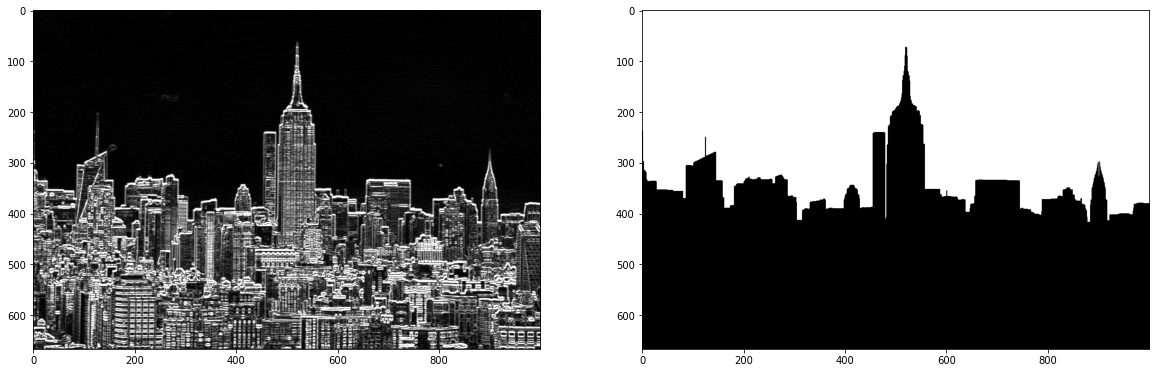

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
from scipy.misc import face
import sys
import cv2
import PIL
#from google.colab import files
#uploaded = files.upload()
import time
start_time = time.time()
input_file = 'one.jpg'
img= cv2.imread(input_file)
h,w,c = img.shape

while (h>400 or w > 400):
    im = cv2.resize(img, dsize=(w//2, h//2), interpolation=cv2.INTER_CUBIC)
    h,w,c = im.shape
import cv2 as cv

    
src = img
# Check if image is loaded fine


scale = 1
delta = 0   
ddepth = cv.CV_16S
    
src = cv.GaussianBlur(src, (5, 5), 0)
    
    
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
    
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
    
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 1.5, 0)
    
#cv.imwrite('sobel.jpg', grad)  
f, axarr = plt.subplots(1,2,figsize=(20, 9))
axarr[0].imshow(grad,cmap='gray')



#cv.waitKey(0)
#print(grad.shape)
H=grad.shape[0]
W=grad.shape[1]
#print(H)
def objective_function(b):
    sky=[]
    gnd=[]
    if(sum(b)==(H-1)*(W)):
        return 0        
    for i in range(W):
        for j in range(0,b[i]+1):
            sky.append(img[j,i])
        for j in range(b[i]+1,H):
            gnd.append(img[j,i])    

    sky = np.transpose(sky)
    gnd = np.transpose(gnd)
    #print(sky)
    #print(gnd)
    co_s = np.cov(sky)
    co_g = np.cov(gnd)
    #print(co_g)
    co_sD = np.linalg.det(co_s)
    co_gD = np.linalg.det(co_g)
    eig_s, _ = np.linalg.eig(co_s)
    eig_g, _ = np.linalg.eig(co_g)
    J = 1/(2*co_sD + co_gD + (2*eig_s[0]) + (eig_g[0]))
    return J    
def calculate_border(grad,t):
    
    b = [None] * W
    
    for x in range(W):
        b[x]=H-1
        for y in range(H):
            if(grad[y][x]>t):
                b[x]=y
                break
    return b
                
thresh_min=40
thresh_max=175
search_step=4
n=int((thresh_max-thresh_min)/search_step + 1)
j_n_max=0
for k in range(1,n+1):
    #print(k)
    t=thresh_min+((thresh_max-thresh_min)/n-1)*(k-1)
    b_temp=calculate_border(grad,t)   
    j_n_temp=objective_function(b_temp)
    if j_n_temp>j_n_max:
        j_n_max=j_n_temp
        b_opt=b_temp
#print(b_opt)     
lowest_pixel=[]
arr=img
for i in range(W):
        for j in range(0,b_opt[i]+1):
            arr[j][i]=255
        for j in range(b_opt[i]+1,H):
            arr[j][i]=0 
#imgplot = plt.imshow(arr,cmap='gray')
#plt.show()
axarr[1].imshow(arr,cmap='gray')
#cv2.imwrite(input_file[:-4]+str('_out_2.jpg'), arr) 
#print("--- %s seconds ---" % (time.time() - start_time))